# Capstone Project on TED talk analysis : Data Storytelling

Springboard Data Science Career Track ; 
Author : Pavan Poosarla, pavanpoosarla01@gmail.com

Start Date : 2/ 05/ 2019
Description :
This is second section of the capstone project on data storytelling. For the first part on Data Wrangling, see "Capstone1_DataWrangling.ipynb".
In this section, we will look at the dataset and extract useful insights about the data. 

Original Date Source
https://www.kaggle.com/rounakbanik/ted-talks/downloads/ted-talks.zip/3

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [71]:
# Read the output of Data Storytelling
df_clean = pd.read_csv(r'After_DataWrang_Out.csv', index_col = 0)

In [72]:
print ('Shape is', df_clean.shape)
df_clean.head(3)

Shape is (2412, 41)


,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,...,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,event_type
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,Ken Robinson,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",...,242,7346,10581,300,10704,4439,1174,209,24924,TED
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,Al Gore,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",...,62,443,132,258,268,116,203,131,413,TED
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,David Pogue,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",...,27,395,166,104,230,54,146,142,230,TED


The dataset consists a total of 2412 talks.

In [73]:
print ('The talks are from a total of %d events'%len(set(list(df_clean['event']))))

The talks are from a total of 318 events


In [87]:
# The 318 individual events are classified braodly into fewer categories
df_clean["event_type"] = df_clean["event_type"].astype('category')
print ('Individual TED events are classified into following categories: ', set(list(df_clean['event_type'])))

Individual TED events are classified into following categories:  {'TEDGlobal', 'TEDSalon', 'Other', 'TEDWomen', 'TEDMED', 'TEDx', 'TEDActive', 'TEDYouth', 'TED'}


In [88]:
df_clean['event_type'].describe()

count     2412
unique       9
top        TED
freq      1186
Name: event_type, dtype: object

[Text(0, 0, 'TED'),
 Text(0, 0, 'TEDx'),
 Text(0, 0, 'TEDGlobal'),
 Text(0, 0, 'TEDWomen'),
 Text(0, 0, 'TEDSalon'),
 Text(0, 0, 'TEDMED'),
 Text(0, 0, 'TEDYouth'),
 Text(0, 0, 'TEDActive'),
 Text(0, 0, 'Other')]

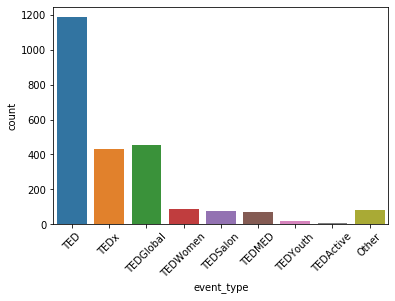

In [105]:
label_order = ['TED', 'TEDx', 'TEDGlobal', 'TEDWomen', 'TEDSalon', 'TEDMED', 'TEDYouth', 'TEDActive', 'Other']
chart = sns.countplot(data = df_clean, x ='event_type', order = label_order, orient = 'h')
chart.set_xticklabels(labels = label_order,  rotation=45)

[Text(0, 0, 'TED'),
 Text(0, 0, 'TEDx'),
 Text(0, 0, 'TEDGlobal'),
 Text(0, 0, 'TEDWomen'),
 Text(0, 0, 'TEDSalon'),
 Text(0, 0, 'TEDMED'),
 Text(0, 0, 'TEDYouth'),
 Text(0, 0, 'TEDActive'),
 Text(0, 0, 'Other')]

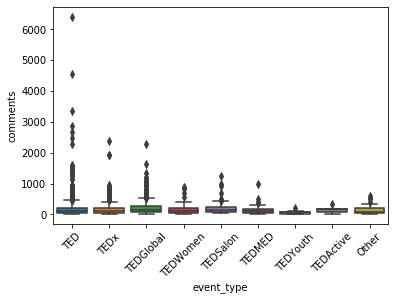

In [124]:
chart = sns.boxplot(data = df_clean, x ='event_type', y = 'comments',order = label_order)
chart.set_xticklabels(labels = label_order,  rotation=45)
#plt.ylim(0, 6000)

As can be seen, majority of talks are in regular TED events, followed by TED GLobal and TEDx events. Other versions of TED, including Women, MED , Salon, etc. do not have as many talks

In [69]:
(set(list(df_clean['event'])))

{'Arbejdsglaede Live',
 'Business Innovation Factory',
 'Chautauqua Institution',
 'DLD 2007',
 'EG 2007',
 'EG 2008',
 'Elizabeth G. Anderson School',
 'Full Spectrum Auditions',
 'Global Witness HQ',
 'INK Conference',
 'LIFT 2007',
 'Mission Blue II',
 'Mission Blue Voyage',
 'Serious Play 2008',
 'Skoll World Forum 2007',
 'TED Fellows 2015',
 'TED Fellows Retreat 2013',
 'TED Fellows Retreat 2015',
 'TED Prize Wish',
 'TED Residency',
 'TED Senior Fellows at TEDGlobal 2010',
 'TED Studio',
 'TED Talks Education',
 'TED Talks Live',
 'TED in the Field',
 'TED-Ed Weekend',
 'TED1984',
 'TED1990',
 'TED1994',
 'TED1998',
 'TED2001',
 'TED2002',
 'TED2003',
 'TED2004',
 'TED2005',
 'TED2006',
 'TED2007',
 'TED2008',
 'TED2009',
 'TED2010',
 'TED2011',
 'TED2012',
 'TED2013',
 'TED2014',
 'TED2015',
 'TED2016',
 'TED2017',
 'TED@BCG Berlin',
 'TED@BCG London',
 'TED@BCG Paris',
 'TED@BCG San Francisco',
 'TED@BCG Singapore',
 'TED@Bangalore',
 'TED@Cannes',
 'TED@IBM',
 'TED@Intel',
 '

### Lets look at the talks themselves

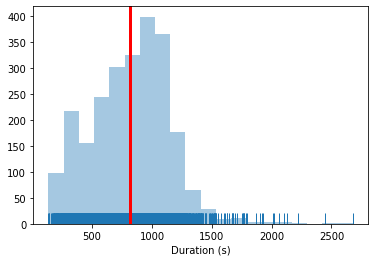

In [56]:
# Duration of the talks
sns.distplot(df_clean['duration'], bins=20, kde=False, rug=True, axlabel = 'Duration (s)')
mean_time = np.mean(df_clean['duration'])
# mean_time
plt.axvline(mean_time, 0,1, c = 'r', linewidth = 3)
# plt.axvline([500, 1500], 0,1, c = 'b', linewidth = 1)

In [63]:
print('The mean length of the talks is about %d minutes (%d seconds to be exact)'%((mean_time/60), mean_time))

The mean length of the talks is about 13 minutes (820 seconds to be exact)


In [54]:
#print('The mean length of the talks is %d minutes'%(mean_time/60))